In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

Importing data

In [221]:
df = pd.read_csv('all_data.csv')
print(df.head())
df.describe(include='all')
# print(df.isna().any(axis=1))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


Data cleaning

In [222]:
# rename columns
df = df.rename(str.lower, axis='columns')
df = df.rename(columns={"life expectancy at birth (years)" : "life_expectancy"})
columns = df.columns

Helper functions

In [223]:
def refresh(title="filename"):
    plt.savefig(f'figures/{title}.png' , bbox_inches='tight')
    plt.show()
    plt.close()
def label(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
def facet_grid(xvar, yvar, xlabel="", ylabel="", df=df):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    r = 0
    c = 0
    for i, country in enumerate(countries):
        curr_country = df[df.country == country]
        curr_plt = axs[r, c]
        curr_plt.set_title(f"Country = {country}")
        curr_plt.plot(curr_country[xvar], curr_country[yvar], color='C{0}'.format(i))
        if(r < 1):
            r+=1
        else: 
            r=0
        if(c < 2): 
            c+=1
        else: 
            c=0
    # Label axes
    for ax in axs.flat:
        ax.set(xlabel=xlabel, ylabel=ylabel)
    # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()

In [224]:
df_mean = df.drop("year", axis = 1).groupby("country").mean().reset_index()
df_mean

,country,life_expectancy,gdp
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Life expectancy by country

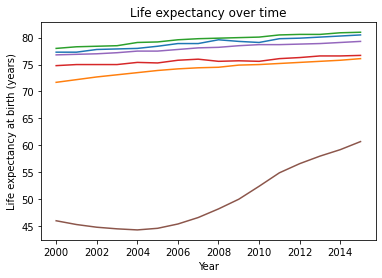

In [225]:
countries = df.country.unique()
for country in countries:
    curr_country = df[df.country == country]
    label("Life expectancy over time", "Year", "Life expectancy at birth (years)")
    plt.plot(curr_country.year, curr_country.life_expectancy)
# plt.legend(countries)
refresh("life_expectancy_over_time")

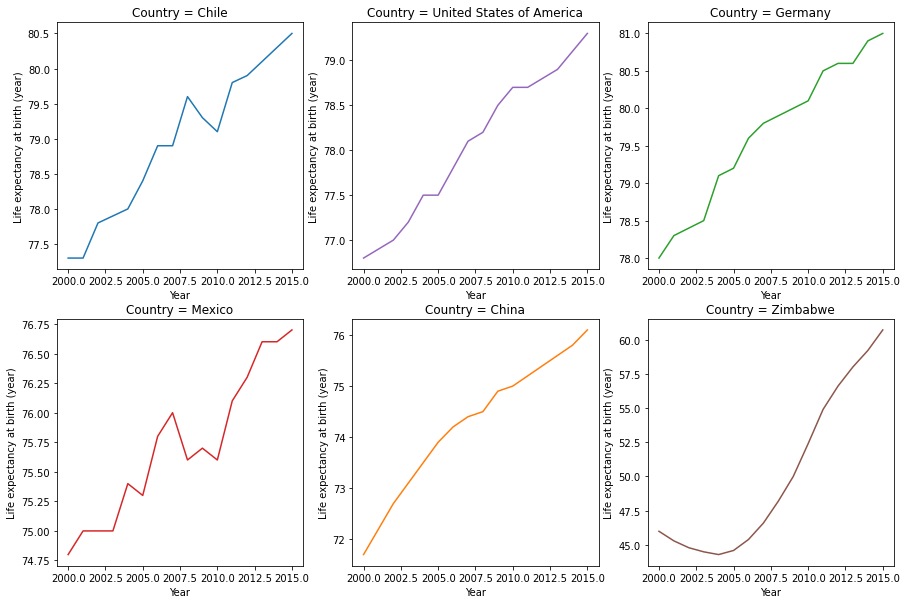

In [226]:
facet_grid("year", "life_expectancy", "Year", "Life expectancy at birth (year)")
refresh("life_expectancy_facet_grid")

GDP by country

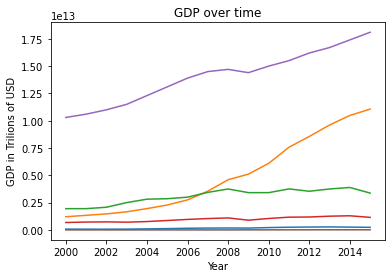

In [227]:
for country in countries:
    curr_country = df[df.country == country]
    label("GDP over time", "Year", "GDP in Trilions of USD")
    plt.plot(curr_country.year, curr_country.gdp)
# plt.legend(countries)
refresh("gdp_over_time")

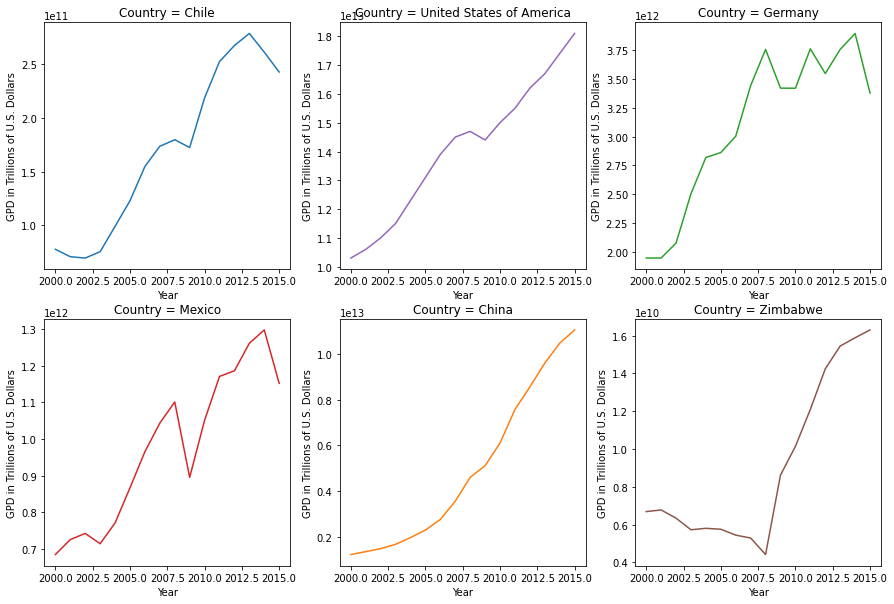

In [228]:
facet_grid("year", "gdp", "Year", "GPD in Trillions of U.S. Dollars")
refresh("facet_grid_gdp")

The average gdp of each country

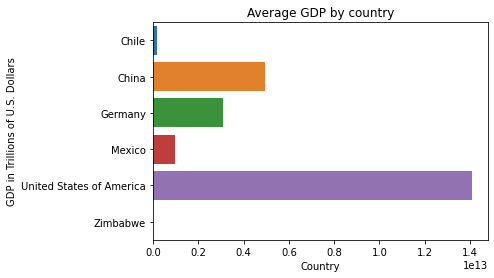

In [229]:
sns.barplot(data=df_mean, x="gdp", y="country")
label("Average GDP by country", "Country", "GDP in Trillions of U.S. Dollars")
refresh("avg_gdp")

The average life expectancy of each country

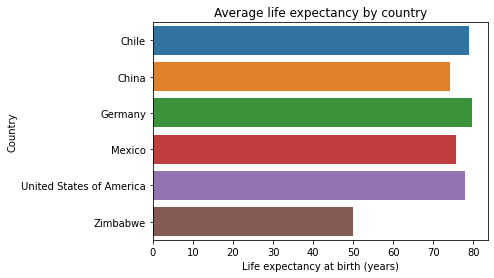

In [230]:
sns.barplot(data=df_mean, x="life_expectancy", y="country")
label("Average life expectancy by country", "Life expectancy at birth (years)", "Country")
refresh("avg_life_expectancy")

Life expectancy distributions by country

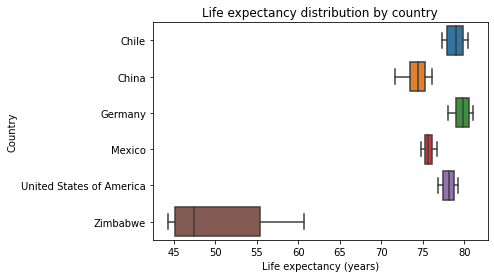

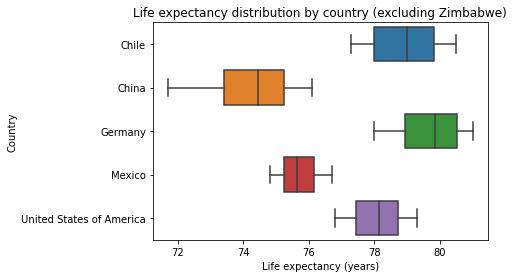

In [231]:
sns.boxplot(data=df,  x="life_expectancy", y="country")
label("Life expectancy distribution by country", "Life expectancy (years)", "Country")
refresh("bp_life_expectancy")

no_zimbabwe = df[df.country != "Zimbabwe"]
sns.boxplot(data=no_zimbabwe,  x="life_expectancy", y="country")
label("Life expectancy distribution by country (excluding Zimbabwe)", "Life expectancy (years)", "Country")
refresh("bp_life_expectancy_no_zibw")

Correlation between GDP and life expectancy of a country

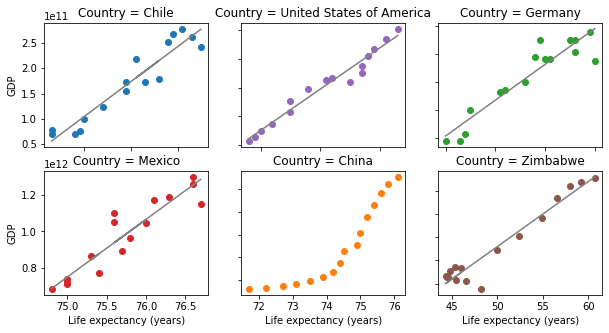

In [232]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
r = 0
c = 0
for i, country in enumerate(countries):
    curr_country = df[df.country == country]
    curr_plt = axs[r, c]
    
    curr_plt.set_title(f"Country = {country}")
    curr_plt.scatter(curr_country.life_expectancy, curr_country.gdp, color='C{0}'.format(i))
    a, b = np.polyfit(curr_country.life_expectancy, curr_country.gdp, 1)
    if(country != "China"):
        curr_plt.plot(curr_country.life_expectancy, a*curr_country.life_expectancy+b,  color='gray')
    if(r < 1):
        r+=1
    else: 
        r=0
    if(c < 2): 
        c+=1
    else: 
        c=0
        
for ax in axs.flat:
    ax.set(xlabel='Life expectancy (years)', ylabel='GDP')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
refresh("life_expectancy_vs_gdp")

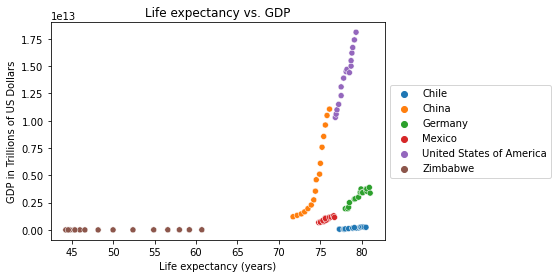

In [233]:
sns.scatterplot(data=df, x="life_expectancy", y="gdp", hue=df.country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
label("Life expectancy vs. GDP", "Life expectancy (years)", "GDP in Trillions of US Dollars")

refresh("life_expectancy_vs_gdp_scatter")

Aggregate statistics

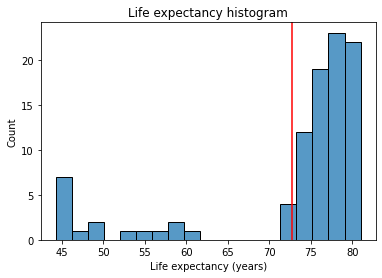

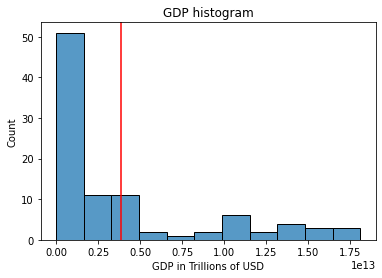

In [234]:
sns.histplot(data=df, x="life_expectancy")
plt.axvline(df.life_expectancy.mean(), color="red")
label("Life expectancy histogram", "Life expectancy (years)", "Count")
refresh("agg_life_expectancy")
sns.histplot(data=df, x="gdp")
plt.axvline(df.gdp.mean(), color="red")
label("GDP histogram", "GDP in Trillions of USD", "Count")
refresh("agg_gdp")